In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [2]:
train = pd.read_csv("Train (1).csv")
test = pd.read_csv("Test.csv")

In [3]:
print(train.shape)
print(test.shape)

(135633, 26)
(45211, 25)


In [4]:
train.head()

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Age,...,Loan,Contact,Day,Month,Duration,contacts_during_campaign,pdays,previous_contacts,poutcome,target_variable
0,PQ100001,IN,AA,Region-1,2,Y,Y,M,175,58,...,no,unknown,5,may,261,1,-1,0,unknown,1
1,PQ100002,USA,AB,Region-2,1,N,N,F,150,44,...,no,unknown,5,may,151,1,-1,0,unknown,1
2,PQ100003,CA,AC,Region-3,1,N,Y,M,151,33,...,yes,unknown,5,may,76,1,-1,0,unknown,1
3,PQ100004,UK,AD,Region-4,1,Y,N,F,155,47,...,no,unknown,5,may,92,1,-1,0,unknown,1
4,PQ100005,PK,AE,Region-5,0,Y,Y,M,120,33,...,no,unknown,5,may,198,1,-1,0,unknown,1


In [5]:
train.isnull().sum()

Customer_ID                     0
Nationality                     0
State                           0
Region                          0
Num_dependants                  0
Social_Media_presence           0
International_Travel_History    0
Gender                          0
Months_at_Current_address       0
Age                             0
Job                             0
Marital Status                  0
Education                       0
Default                         0
Balance                         0
Housing                         0
Loan                            0
Contact                         0
Day                             0
Month                           0
Duration                        0
contacts_during_campaign        0
pdays                           0
previous_contacts               0
poutcome                        0
target_variable                 0
dtype: int64

In [6]:
print(train.Age.min())
print(train.Age.max())

18
99


In [7]:
bins= [18,26,66,100]
labels = ['Young','Adult','SeniorCitizen']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

In [8]:
print(train.Balance.min())
print(train.Balance.max())

-8019
102195


In [9]:
bins= [-8019,0,1,102196]
labels = ['Negative Balance','Zero Balance','Positive Balance']
train['BalanceGroup'] = pd.cut(train['Balance'], bins=bins, labels=labels, right=False)
test['BalanceGroup'] = pd.cut(train['Balance'], bins=bins, labels=labels, right=False)

In [10]:
train1=train.drop(['Age','Balance'], axis = 1)
test.drop(['Age','Balance'], axis = 1)

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Job,...,Contact,Day,Month,Duration,contacts_during_campaign,pdays,previous_contacts,poutcome,AgeGroup,BalanceGroup
0,PT400001,IN,AA,Region-1,2,Y,Y,M,183,management,...,unknown,6,may,281,2,-1,0,unknown,Adult,Positive Balance
1,PT400002,USA,AB,Region-2,1,N,N,F,150,technician,...,unknown,5,may,164,2,-1,0,unknown,Adult,Positive Balance
2,PT400003,CA,AC,Region-3,1,N,Y,M,131,entrepreneur,...,unknown,5,may,122,2,-1,0,unknown,Adult,Positive Balance
3,PT400004,UK,AD,Region-4,1,Y,N,F,158,blue-collar,...,unknown,5,may,97,1,-1,0,unknown,Adult,Positive Balance
4,PT400005,PK,AE,Region-5,0,Y,Y,M,104,unknown,...,unknown,7,may,286,2,-1,0,unknown,Adult,Positive Balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,PT445207,KE,AC,Region-2,5,N,Y,M,33,technician,...,cellular,18,nov,1088,3,-1,0,unknown,Adult,Positive Balance
45207,PT445208,IN,AD,Region-3,2,N,N,F,125,retired,...,cellular,18,nov,494,3,-1,0,unknown,SeniorCitizen,Positive Balance
45208,PT445209,USA,AE,Region-4,2,Y,Y,M,154,retired,...,cellular,19,nov,1244,5,184,3,success,SeniorCitizen,Positive Balance
45209,PT445210,CA,AF,Region-5,2,N,N,F,174,blue-collar,...,telephone,18,nov,514,4,-1,0,unknown,Adult,Positive Balance


In [11]:
for col in ['AgeGroup','BalanceGroup']:
    train1[col]= train1[col].astype('object')

In [12]:
train1.dtypes

Customer_ID                     object
Nationality                     object
State                           object
Region                          object
Num_dependants                   int64
Social_Media_presence           object
International_Travel_History    object
Gender                          object
Months_at_Current_address        int64
Job                             object
Marital Status                  object
Education                       object
Default                         object
Housing                         object
Loan                            object
Contact                         object
Day                              int64
Month                           object
Duration                         int64
contacts_during_campaign         int64
pdays                            int64
previous_contacts                int64
poutcome                        object
target_variable                  int64
AgeGroup                        object
BalanceGroup             

In [13]:
# list of numerical variables
numerical_features = [feature for feature in train1.columns if train1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train1[numerical_features].head()

Number of numerical variables:  8


,Num_dependants,Months_at_Current_address,Day,Duration,contacts_during_campaign,pdays,previous_contacts,target_variable
0,2,175,5,261,1,-1,0,1
1,1,150,5,151,1,-1,0,1
2,1,151,5,76,1,-1,0,1
3,1,155,5,92,1,-1,0,1
4,0,120,5,198,1,-1,0,1


In [14]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train1[feature].unique())<25 and feature not in ['Customer_ID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [15]:
train1[discrete_feature].head()

,Num_dependants,target_variable
0,2,1
1,1,1
2,1,1
3,1,1
4,0,1


In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Customer_ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


In [17]:
categorical_features=[feature for feature in train1.columns if train1[feature].dtypes=='O'and feature not in ['Customer_ID']]
categorical_features

['Nationality',
 'State',
 'Region',
 'Social_Media_presence',
 'International_Travel_History',
 'Gender',
 'Job',
 'Marital Status',
 'Education',
 'Default',
 'Housing',
 'Loan',
 'Contact',
 'Month',
 'poutcome',
 'AgeGroup',
 'BalanceGroup']

In [18]:
train1[categorical_features].head()

,Nationality,State,Region,Social_Media_presence,International_Travel_History,Gender,Job,Marital Status,Education,Default,Housing,Loan,Contact,Month,poutcome,AgeGroup,BalanceGroup
0,IN,AA,Region-1,Y,Y,M,management,married,tertiary,no,yes,no,unknown,may,unknown,Adult,Positive Balance
1,USA,AB,Region-2,N,N,F,technician,single,secondary,no,yes,no,unknown,may,unknown,Adult,Positive Balance
2,CA,AC,Region-3,N,Y,M,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,Adult,Positive Balance
3,UK,AD,Region-4,Y,N,F,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,Adult,Positive Balance
4,PK,AE,Region-5,Y,Y,M,unknown,single,unknown,no,no,no,unknown,may,unknown,Adult,Positive Balance


In [19]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train1[feature].unique())))

The feature is Nationality and number of categories are 8
The feature is State and number of categories are 12
The feature is Region and number of categories are 5
The feature is Social_Media_presence and number of categories are 2
The feature is International_Travel_History and number of categories are 2
The feature is Gender and number of categories are 2
The feature is Job and number of categories are 12
The feature is Marital Status and number of categories are 3
The feature is Education and number of categories are 4
The feature is Default and number of categories are 2
The feature is Housing and number of categories are 2
The feature is Loan and number of categories are 2
The feature is Contact and number of categories are 3
The feature is Month and number of categories are 12
The feature is poutcome and number of categories are 4
The feature is AgeGroup and number of categories are 3
The feature is BalanceGroup and number of categories are 3


In [20]:
train1.loc[(train1.target_variable == 2),"target_variable"] = 'yes'
train1.loc[(train1.target_variable == 1) ,"target_variable"] = 'no'
train1.loc[(train1.target_variable == "yes"),"target_variable"] = 1
train1.loc[(train1.target_variable == "no") ,"target_variable"] = 0
train1.head()

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Job,...,Day,Month,Duration,contacts_during_campaign,pdays,previous_contacts,poutcome,target_variable,AgeGroup,BalanceGroup
0,PQ100001,IN,AA,Region-1,2,Y,Y,M,175,management,...,5,may,261,1,-1,0,unknown,0,Adult,Positive Balance
1,PQ100002,USA,AB,Region-2,1,N,N,F,150,technician,...,5,may,151,1,-1,0,unknown,0,Adult,Positive Balance
2,PQ100003,CA,AC,Region-3,1,N,Y,M,151,entrepreneur,...,5,may,76,1,-1,0,unknown,0,Adult,Positive Balance
3,PQ100004,UK,AD,Region-4,1,Y,N,F,155,blue-collar,...,5,may,92,1,-1,0,unknown,0,Adult,Positive Balance
4,PQ100005,PK,AE,Region-5,0,Y,Y,M,120,unknown,...,5,may,198,1,-1,0,unknown,0,Adult,Positive Balance


# Exploratory Data Analysis and Data Preprocessing

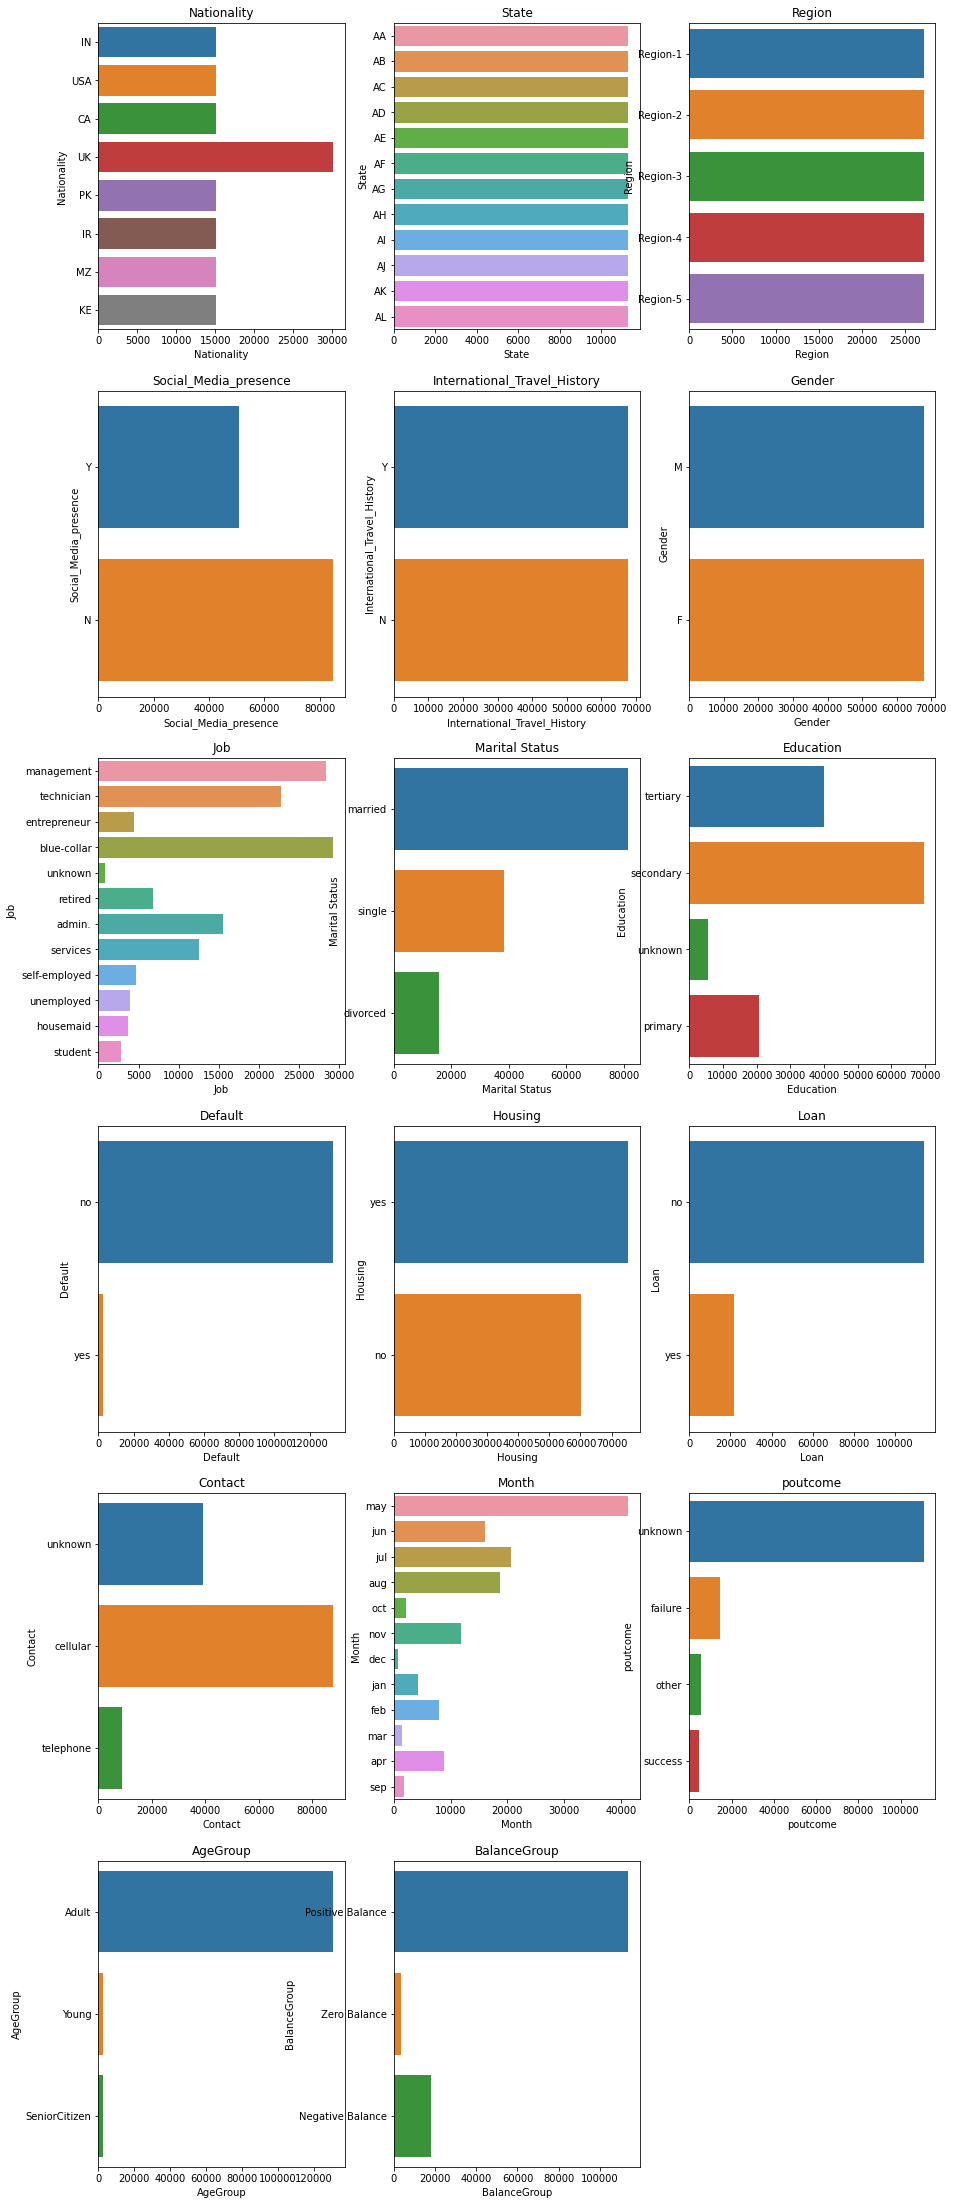

In [21]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features :
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=train1)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

1)client with job type as management records are high in given dataset and housemaid are very less

2)client who married are high in records in given dataset and divorced are less

3)client whose education background is secondary are in high numbers in given dataset


5)data in month of may is high and less in dec

6)Gender, International travel history, region, and state can be dropped as each have propotional responses

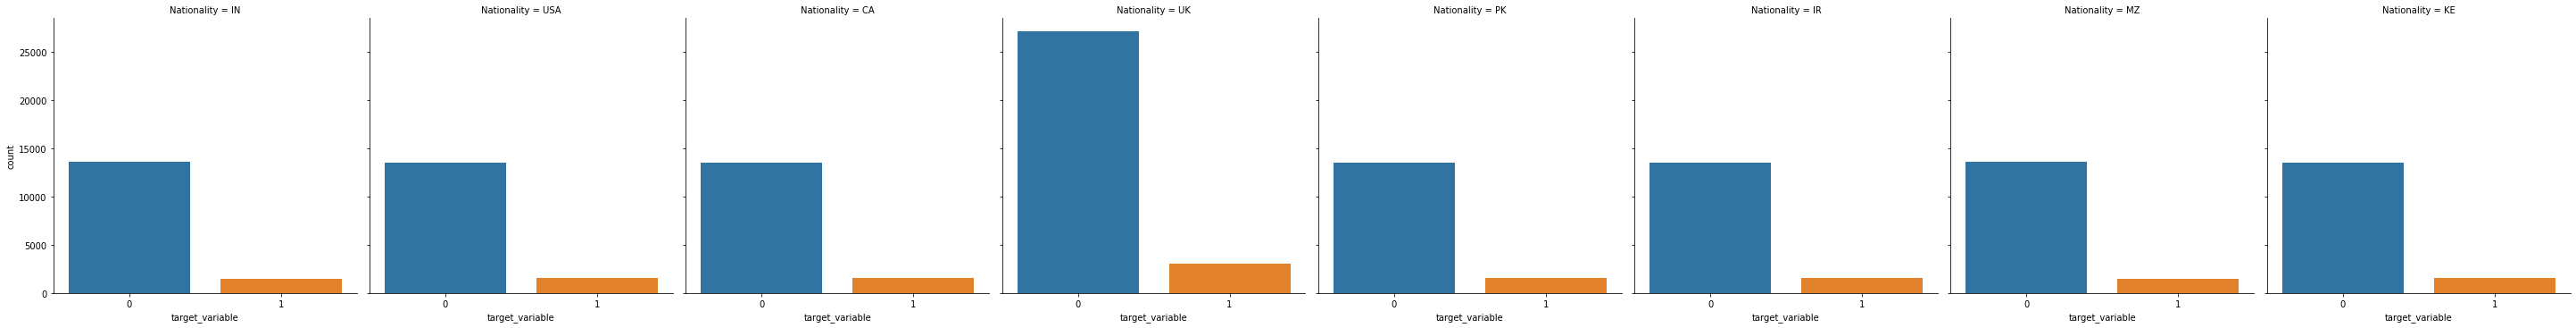

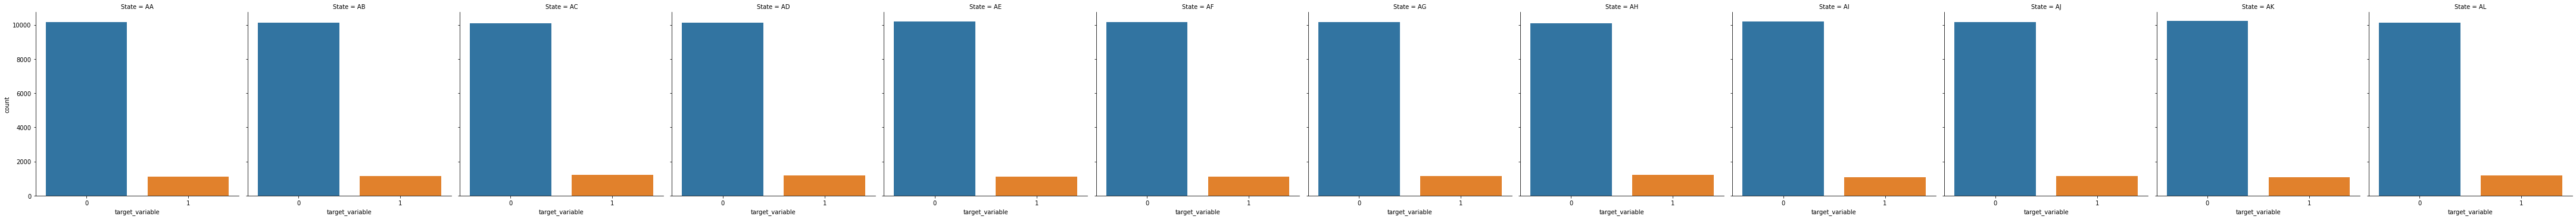

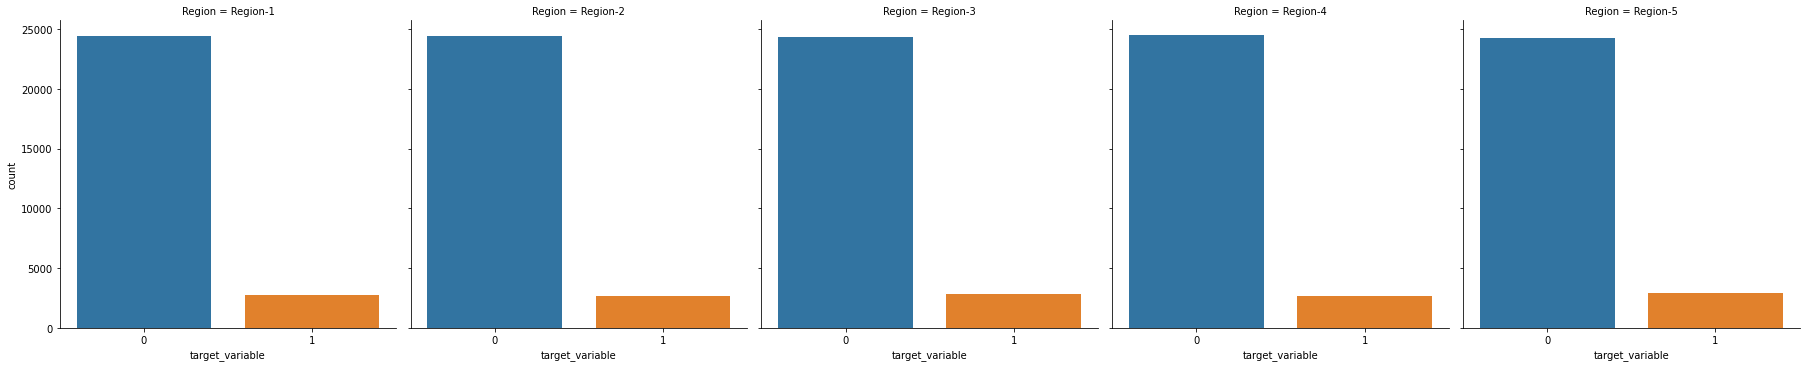

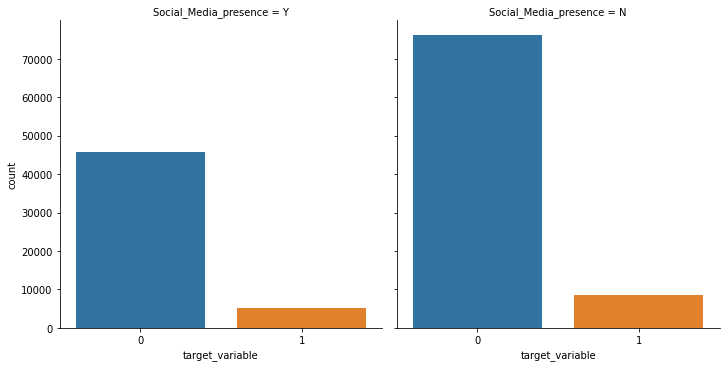

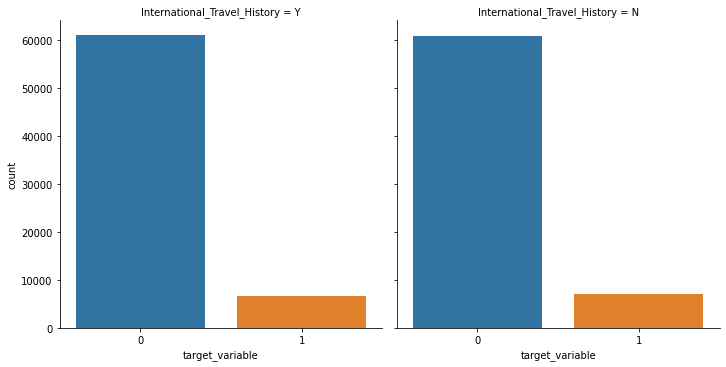

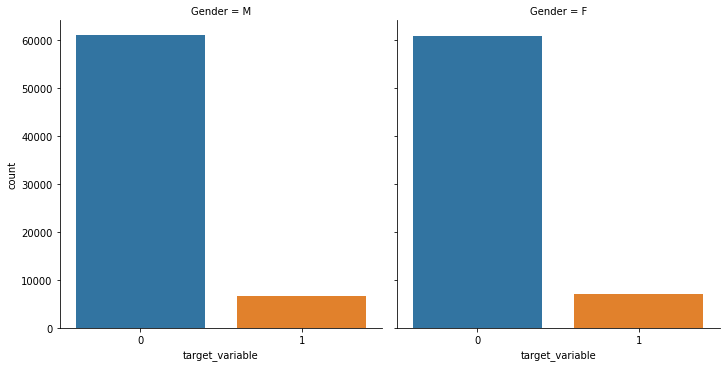

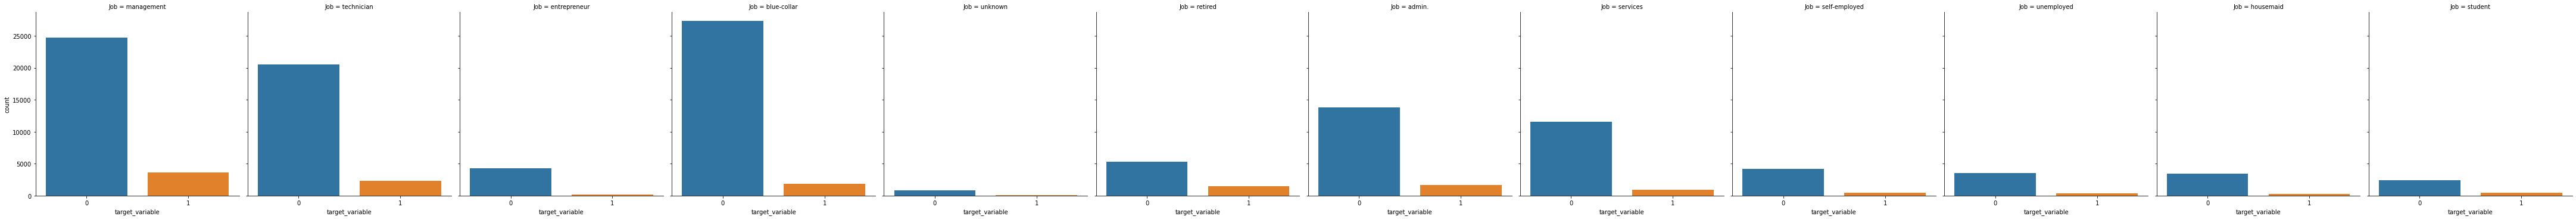

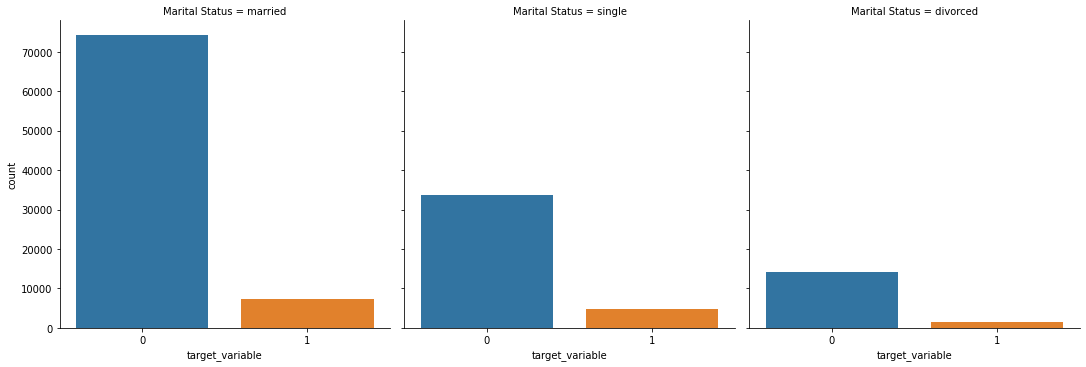

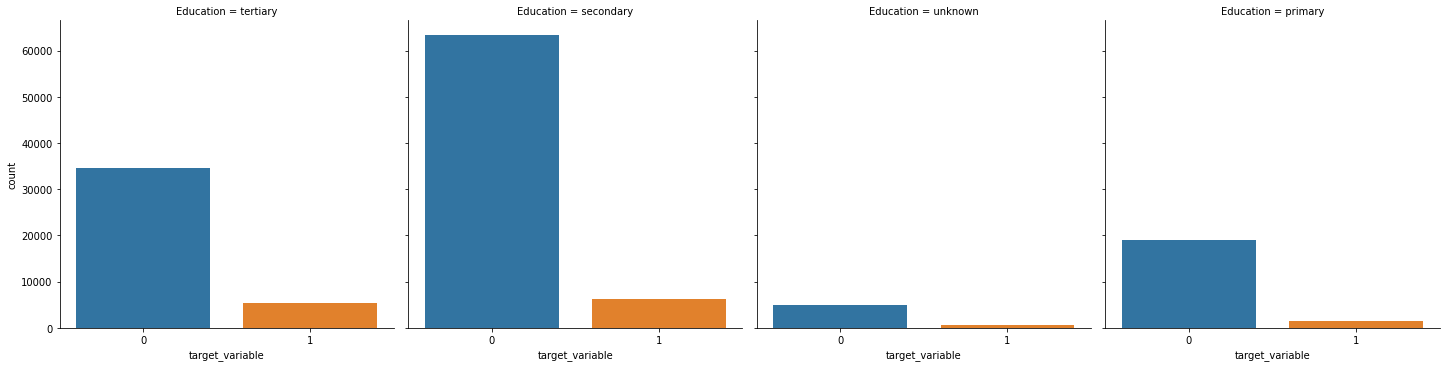

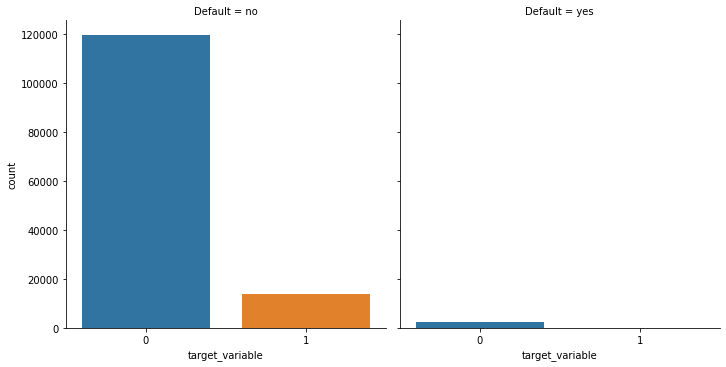

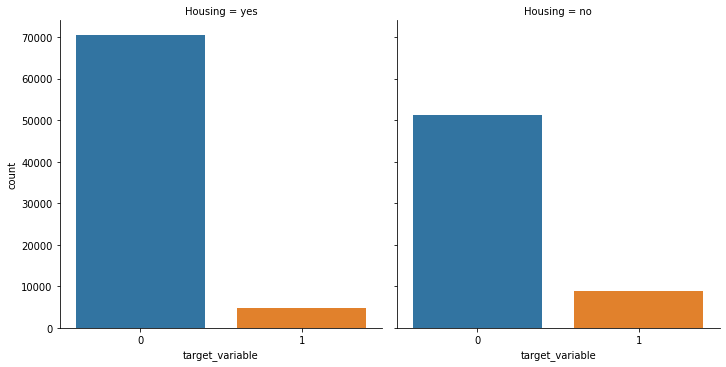

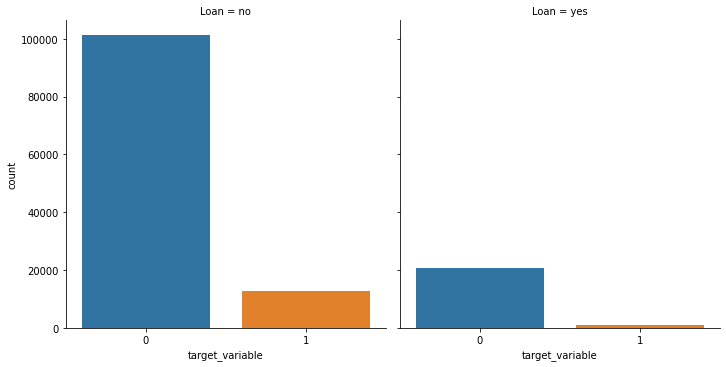

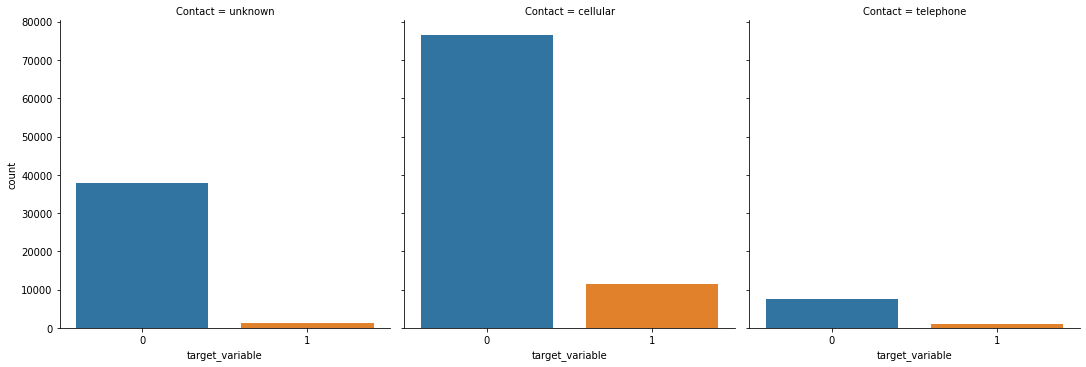

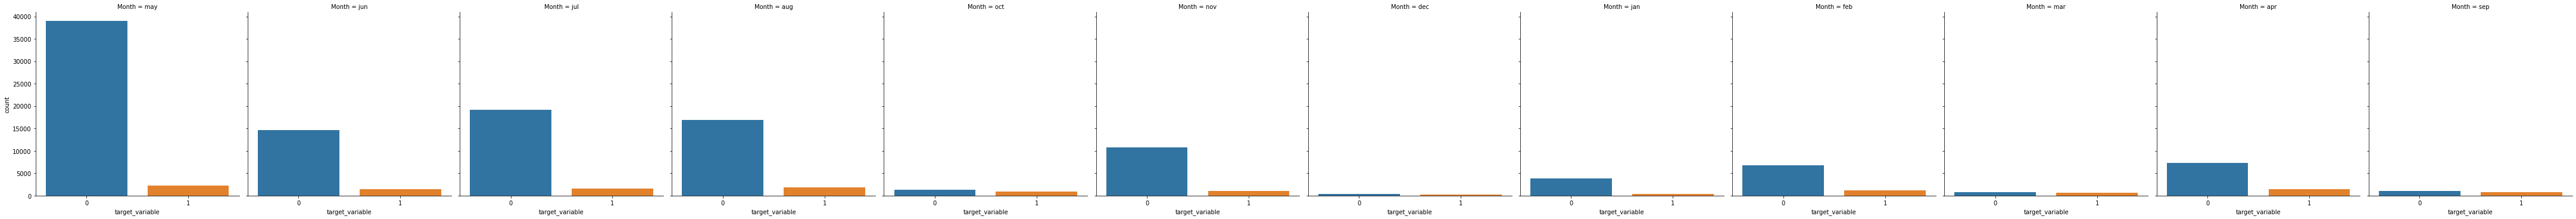

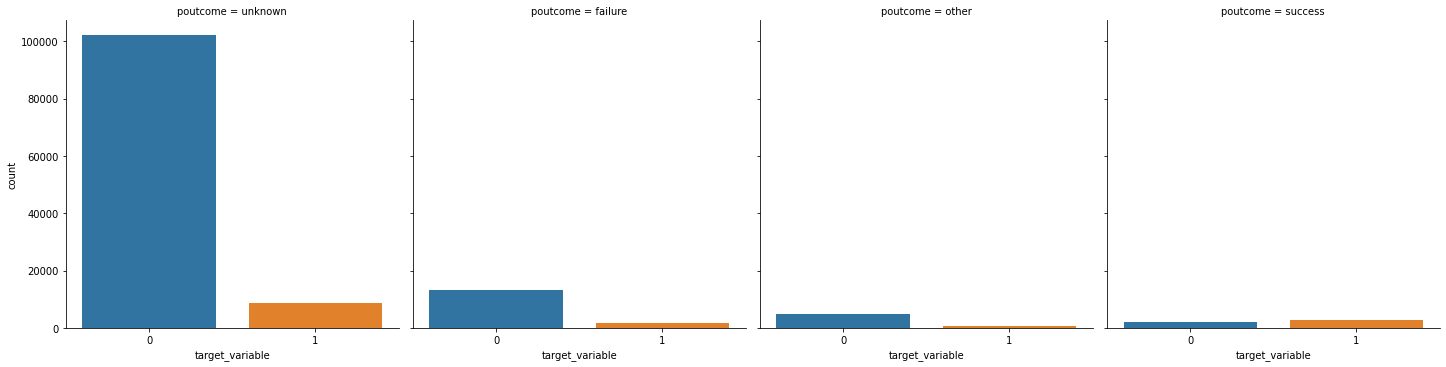

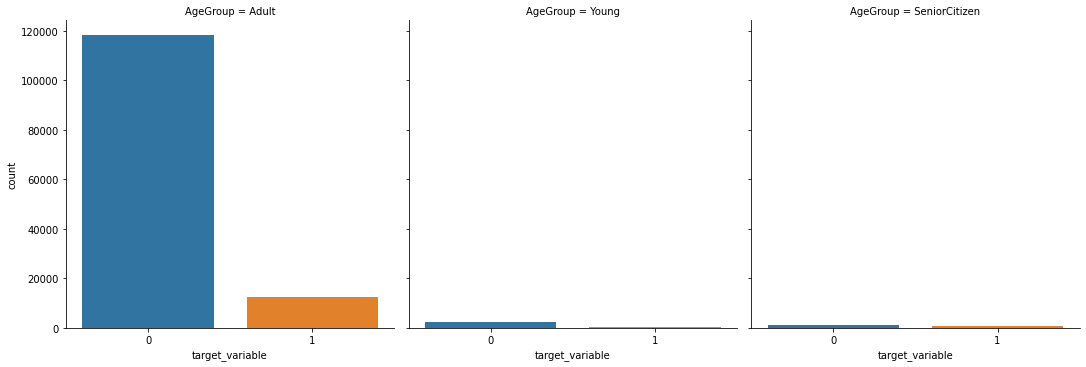

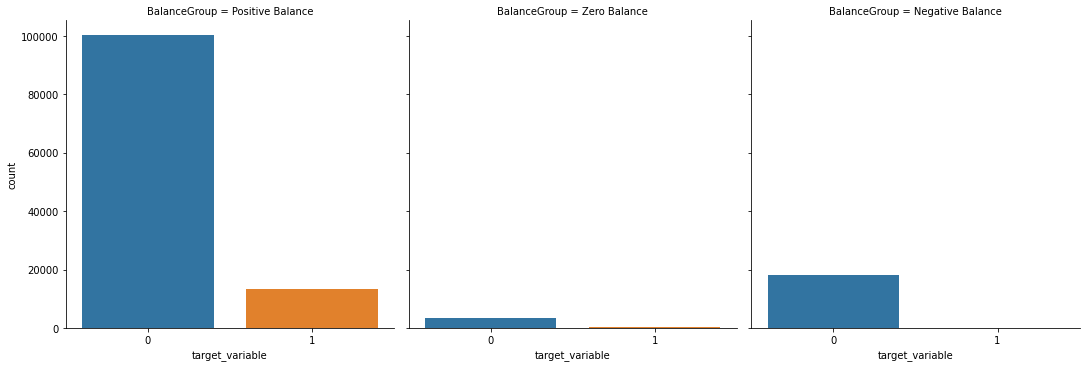

In [22]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='target_variable', col=categorical_feature, kind='count', data= train1)
plt.show()

In [23]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(train1.groupby(['target_variable',categorical_feature]).size())

target_variable  Nationality
0                CA             13516
                 IN             13572
                 IR             13481
                 KE             13551
                 MZ             13578
                 PK             13542
                 UK             27107
                 USA            13553
1                CA              1556
                 IN              1500
                 IR              1588
                 KE              1518
                 MZ              1491
                 PK              1527
                 UK              3034
                 USA             1519
dtype: int64
target_variable  State
0                AA       10182
                 AB       10149
                 AC       10098
                 AD       10129
                 AE       10199
                 AF       10182
                 AG       10156
                 AH       10093
                 AI       10204
                 AJ       10157
       

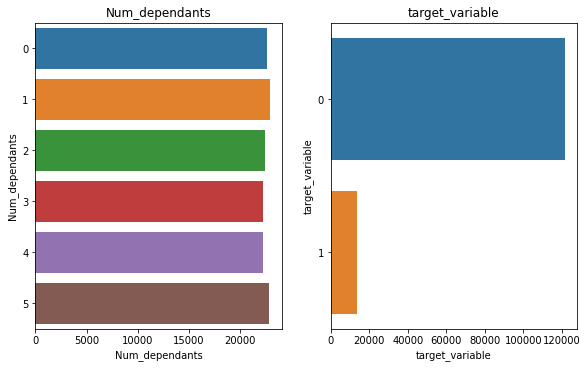

In [24]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for feature in discrete_feature :
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=feature,data=train1)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

Number of dependants can be dropped as each have propotional responses

<AxesSubplot:>

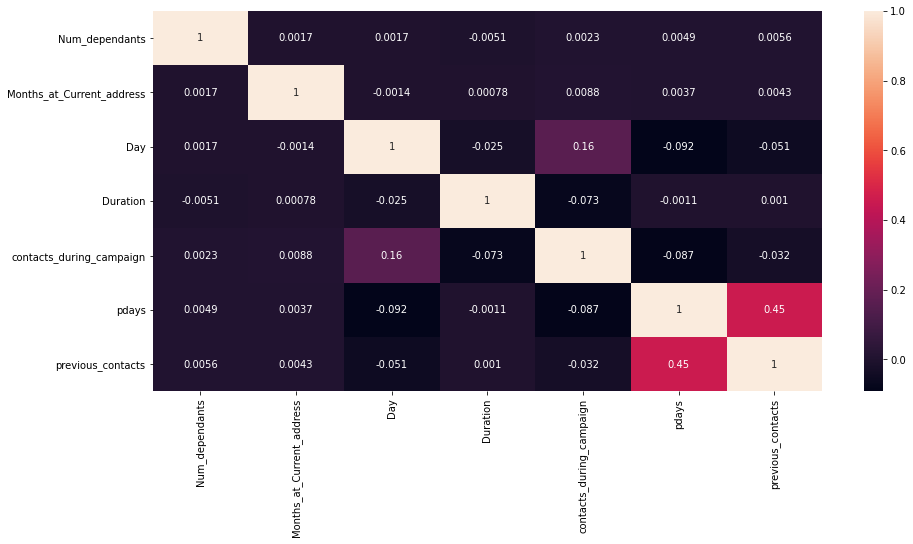

In [25]:
## Checking for correlation
cor_mat=train1.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [26]:
#almost 75% has pdays value as -1, so it is better to drop this column
train1.groupby(['target_variable','pdays']).size()

target_variable  pdays
0                -1       102193
                  1           28
                  2          110
                  3            3
                  4            3
                           ...  
1                 804          3
                  805          3
                  828          3
                  842          3
                  854          3
Length: 913, dtype: int64

In [27]:
train1=train1.drop(['pdays','State','Region','International_Travel_History','Nationality','Num_dependants','Gender'], axis = 1)

In [28]:
train1.loc[(train1.Default== "yes"),"Default"] = 1
train1.loc[(train1.Default== "no") ,"Default"] = 0
train1.loc[(train1.Social_Media_presence == "Y"),"Social_Media_presence"] = 1
train1.loc[(train1.Social_Media_presence == "N") ,"Social_Media_presence"] = 0
train1.loc[(train1.Housing== "yes"),"Housing"] = 1
train1.loc[(train1.Housing== "no") ,"Housing"] = 0
train1.loc[(train1.Loan == "yes"),"Loan"] = 1
train1.loc[(train1.Loan == "no") ,"Loan"] = 0
train1.Default = train1.Default.astype(int)
train1.Housing = train1.Housing.astype(int)
train1.Loan = train1.Loan.astype(int)
train1.Social_Media_presence = train1.Social_Media_presence.astype(int)
train1.target_variable= train1.target_variable.astype(int)

<AxesSubplot:xlabel='target_variable', ylabel='count'>

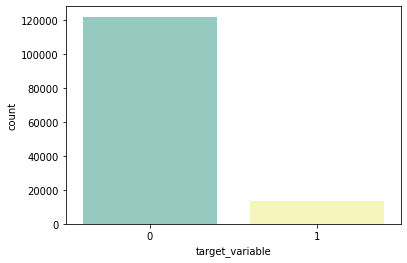

In [29]:
#Class imbalance problem is present in the dataset
sns.countplot(x = 'target_variable', data = train1, palette = 'Set3')

In [30]:
new_train = pd.get_dummies(train1,columns = ['Job','Marital Status','Education','Contact','Month','poutcome','AgeGroup','BalanceGroup'], drop_first = True)
new_train.head()

,Customer_ID,Social_Media_presence,Months_at_Current_address,Default,Housing,Loan,Day,Duration,contacts_during_campaign,previous_contacts,...,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown,AgeGroup_SeniorCitizen,AgeGroup_Young,BalanceGroup_Positive Balance,BalanceGroup_Zero Balance
0,PQ100001,1,175,0,1,0,5,261,1,0,...,0,0,0,0,0,1,0,0,1,0
1,PQ100002,0,150,0,1,0,5,151,1,0,...,0,0,0,0,0,1,0,0,1,0
2,PQ100003,0,151,0,1,1,5,76,1,0,...,0,0,0,0,0,1,0,0,1,0
3,PQ100004,1,155,0,1,0,5,92,1,0,...,0,0,0,0,0,1,0,0,1,0
4,PQ100005,1,120,0,0,0,5,198,1,0,...,0,0,0,0,0,1,0,0,1,0


In [31]:
new_train.drop(columns = ["Customer_ID"],inplace = True)

In [32]:
new_train.describe()

,Social_Media_presence,Months_at_Current_address,Default,Housing,Loan,Day,Duration,contacts_during_campaign,previous_contacts,target_variable,...,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown,AgeGroup_SeniorCitizen,AgeGroup_Young,BalanceGroup_Positive Balance,BalanceGroup_Zero Balance
count,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,...,135633.00000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.000000,135633.00000,135633.000000
mean,0.374997,101.035950,0.018027,0.555838,0.160226,16.300163,303.122529,3.262385,0.580323,0.101251,...,0.08781,0.016323,0.012807,0.040698,0.033421,0.817478,0.016847,0.019885,0.83897,0.026461
std,0.484124,57.548818,0.133048,0.496874,0.366817,8.289782,252.294909,3.172427,2.303424,0.301662,...,0.28302,0.126717,0.112440,0.197591,0.179734,0.386276,0.128698,0.139604,0.36756,0.160503
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,50.000000,0.000000,0.000000,0.000000,9.000000,149.000000,2.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
50%,0.000000,101.000000,0.000000,1.000000,0.000000,17.000000,238.000000,2.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,1.000000,151.000000,0.000000,1.000000,0.000000,22.000000,378.000000,4.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
max,1.000000,215.000000,1.000000,1.000000,1.000000,31.000000,4929.000000,64.000000,275.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [33]:
new_train.dtypes

Social_Media_presence            int32
Months_at_Current_address        int64
Default                          int32
Housing                          int32
Loan                             int32
Day                              int64
Duration                         int64
contacts_during_campaign         int64
previous_contacts                int64
target_variable                  int32
Job_blue-collar                  uint8
Job_entrepreneur                 uint8
Job_housemaid                    uint8
Job_management                   uint8
Job_retired                      uint8
Job_self-employed                uint8
Job_services                     uint8
Job_student                      uint8
Job_technician                   uint8
Job_unemployed                   uint8
Job_unknown                      uint8
Marital Status_married           uint8
Marital Status_single            uint8
Education_secondary              uint8
Education_tertiary               uint8
Education_unknown        

Feature Scaling

In [34]:
feature_scale=[feature for feature in new_train.columns if feature not in ['Customer_ID','target_variable']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(new_train[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.transform(new_train[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([train1[['target_variable']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(new_train[feature_scale]), columns=feature_scale)],
                    axis=1)

# Model Building

In [35]:
X = data.drop('target_variable', axis = 1)
y = data['target_variable']

y = y.astype(int)

Feature Importance

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=45)
fit = bestfeatures.fit(X,y)

In [38]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Social_Media_presence,0.093808
1,Months_at_Current_address,1.360557
2,Default,171.885348
3,Housing,1109.823230
4,Loan,607.844359
5,Day,14.237759
6,Duration,681.386376
7,contacts_during_campaign,44.113823
8,previous_contacts,37.160031
9,Job_blue-collar,455.539055


Feature Selection

In [39]:
Z=featureScores.nlargest(20,'Score')
Z

,Specs,Score
39,poutcome_success,11363.264191
41,AgeGroup_SeniorCitizen,2320.578833
36,Month_oct,2102.417673
33,Month_mar,2093.366607
37,Month_sep,1970.731308
26,Contact_unknown,1956.172034
3,Housing,1109.823230
13,Job_retired,965.024431
34,Month_may,927.983484
28,Month_dec,747.662574


In [40]:
X1=X[Z['Specs']]

Model 1 shows Class Imbalance is there

In [41]:
log_reg = LogisticRegression(random_state=10)
log_reg.fit(X1, y)
print("The Training Accuracy is: ", log_reg.score(X1, y))
y_pred = log_reg.predict(X1)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

The Training Accuracy is:  0.910995111809073
[[119604   2296]
 [  9776   3957]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    121900
           1       0.63      0.29      0.40     13733

    accuracy                           0.91    135633
   macro avg       0.78      0.63      0.67    135633
weighted avg       0.89      0.91      0.90    135633



Random Oversampling to handle class imbalance

In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X1, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 121900, 1: 13733})
Counter({0: 121900, 1: 121900})


Model 2

In [43]:
log_reg1 = LogisticRegression(random_state=10)
log_reg1.fit(X_over, y_over)
print("The Training Accuracy is: ", log_reg1.score(X_over, y_over))
y_pred1 = log_reg1.predict(X_over)
print(confusion_matrix(y_over, y_pred1))
print(classification_report(y_over, y_pred1))

The Training Accuracy is:  0.8235726004922067
[[102431  19469]
 [ 23544  98356]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83    121900
           1       0.83      0.81      0.82    121900

    accuracy                           0.82    243800
   macro avg       0.82      0.82      0.82    243800
weighted avg       0.82      0.82      0.82    243800



Confusion Matrices of Model 1 and Model 2

In [44]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

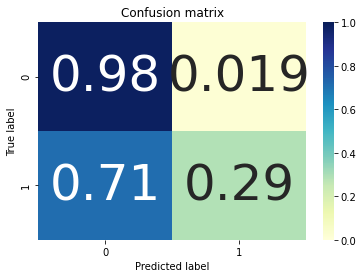

In [45]:

# Visualizing cm

cm = confusion_matrix(y, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

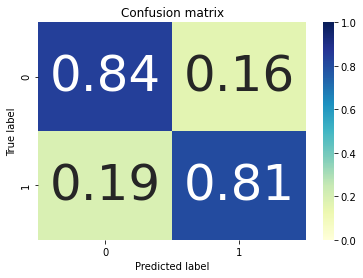

In [46]:

# Visualizing cm

cm = confusion_matrix(y_over, y_pred1)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg1.classes_, title='Confusion matrix')

Hyperparameter Tuning to select the optimum model

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
estimator=LogisticRegression()
cv1=RepeatedStratifiedKFold(n_splits=5)
parameters=[{'solver' : ['liblinear','lbfgs'],
            'C': [100, 10, 1.0, 0.1, 0.01], 'penalty' : ['l2']}]
clf2 = RandomizedSearchCV(estimator,parameters, cv=cv1, return_train_score=False,n_jobs=-1)
clf2.fit(X_over, y_over)
clf2.cv_results_

{'mean_fit_time': array([2.84345805, 5.61746695, 2.36852239, 5.20062665, 2.38514059,
        4.07978486, 1.58228122, 4.22396261, 1.91247458, 4.43361427]),
 'std_fit_time': array([0.59520571, 0.95266888, 0.41746205, 0.85336405, 0.40657886,
        0.40164359, 0.08647763, 0.83124285, 0.54279397, 0.71554385]),
 'mean_score_time': array([0.02667948, 0.02447156, 0.02333436, 0.02275331, 0.02336069,
        0.01634911, 0.01633794, 0.02550173, 0.02461302, 0.02670046]),
 'std_score_time': array([0.01893693, 0.01609566, 0.0198948 , 0.02098957, 0.01426491,
        0.00761523, 0.00821   , 0.02721642, 0.02175442, 0.01666411]),
 'param_solver': masked_array(data=['liblinear', 'lbfgs', 'liblinear', 'lbfgs',
                    'liblinear', 'lbfgs', 'liblinear', 'lbfgs',
                    'liblinear', 'lbfgs'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_arr

In [49]:
print(clf2.best_params_)
print(clf2.best_score_)

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.8236222313371617


In [50]:
classification= LogisticRegression(solver= 'lbfgs', penalty='l2', C= 100)

Model 3(Final Model)

In [51]:
classification.fit(X_over, y_over)
print("The Training Accuracy is: ", classification.score(X_over, y_over))
y_pred4 = classification.predict(X_over)
print(confusion_matrix(y_over, y_pred4))
print(classification_report(y_over, y_pred4))

The Training Accuracy is:  0.8235192780968007
[[102413  19487]
 [ 23539  98361]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83    121900
           1       0.83      0.81      0.82    121900

    accuracy                           0.82    243800
   macro avg       0.82      0.82      0.82    243800
weighted avg       0.82      0.82      0.82    243800



ROC curve and Cross Validation Score for Model 3

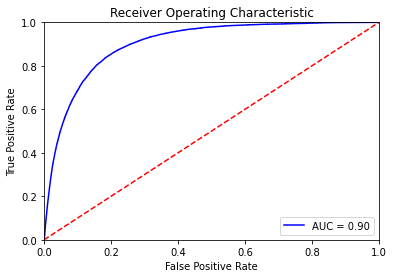

In [66]:

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classification.predict_proba(X_over)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_over, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classification,X_over, y_over,cv=5)

In [54]:
score.mean()

0.8149261689909763

# Model 3 Results on Test Set

In [55]:
test.loc[(test.Default == "yes"),"Default"] = 1
test.loc[(test.Default == "no") ,"Default"] = 0
test.loc[(test.Social_Media_presence == "Y"),"Social_Media_presence"] = 1
test.loc[(test.Social_Media_presence == "N") ,"Social_Media_presence"] = 0
test.loc[(test.International_Travel_History == "Y"),"International_Travel_History"] = 1
test.loc[(test.International_Travel_History == "N") ,"International_Travel_History"] = 0
test.loc[(test.Gender == "M"),"Gender"] = 1
test.loc[(test.Gender == "F") ,"Gender"] = 0
test.loc[(test.Housing == "yes"),"Housing"] = 1
test.loc[(test.Housing == "no") ,"Housing"] = 0
test.loc[(test.Loan == "yes"),"Loan"] = 1
test.loc[(test.Loan == "no") ,"Loan"] = 0

In [56]:

test1= pd.get_dummies(test,columns = ['Job','Marital Status','Education','Contact','Month','poutcome','AgeGroup','BalanceGroup'])
test1.head()

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Age,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,AgeGroup_Young,AgeGroup_Adult,AgeGroup_SeniorCitizen,BalanceGroup_Negative Balance,BalanceGroup_Zero Balance,BalanceGroup_Positive Balance
0,PT400001,IN,AA,Region-1,2,1,1,1,183,56,...,0,0,0,1,0,1,0,0,0,1
1,PT400002,USA,AB,Region-2,1,0,0,0,150,47,...,0,0,0,1,0,1,0,0,0,1
2,PT400003,CA,AC,Region-3,1,0,1,1,131,32,...,0,0,0,1,0,1,0,0,0,1
3,PT400004,UK,AD,Region-4,1,1,0,0,158,48,...,0,0,0,1,0,1,0,0,0,1
4,PT400005,PK,AE,Region-5,0,1,1,1,104,34,...,0,0,0,1,0,1,0,0,0,1


In [57]:
test1=test1.drop(['pdays','State','Region','International_Travel_History','Nationality','Num_dependants','Gender','Age','Balance'], axis = 1)

In [58]:
feature_scale=[feature for feature in test1.columns if feature not in ['Customer_ID','target_variable']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(test1[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

scaler.transform(test1[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data1 = pd.concat([test[['Customer_ID']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test1[feature_scale]), columns=feature_scale)],
                    axis=1)

In [59]:
x=data1[Z['Specs']]

In [60]:
y_prediction=classification.predict(x)

In [61]:
y_pred= pd.DataFrame(y_prediction)

In [62]:
print(y_pred)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
45206  1
45207  1
45208  1
45209  1
45210  1

[45211 rows x 1 columns]


In [63]:
df=pd.DataFrame(test)
result=pd.merge(df,y_pred,how = 'left',left_index = True, right_index = True)
rslt=result.drop(['Age','Balance'],axis=1)

In [64]:
rslt.head()

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Job,...,Day,Month,Duration,contacts_during_campaign,pdays,previous_contacts,poutcome,AgeGroup,BalanceGroup,0
0,PT400001,IN,AA,Region-1,2,1,1,1,183,management,...,6,may,281,2,-1,0,unknown,Adult,Positive Balance,0
1,PT400002,USA,AB,Region-2,1,0,0,0,150,technician,...,5,may,164,2,-1,0,unknown,Adult,Positive Balance,0
2,PT400003,CA,AC,Region-3,1,0,1,1,131,entrepreneur,...,5,may,122,2,-1,0,unknown,Adult,Positive Balance,0
3,PT400004,UK,AD,Region-4,1,1,0,0,158,blue-collar,...,5,may,97,1,-1,0,unknown,Adult,Positive Balance,0
4,PT400005,PK,AE,Region-5,0,1,1,1,104,unknown,...,7,may,286,2,-1,0,unknown,Adult,Positive Balance,0


In [65]:
rslt.to_csv('Important(Most).csv',index=False)